In [1]:
import os
import scipy.stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [8]:
directory = '/home/refu0917/lungcancer/remote_output1/output_folder/fl_folder'
fedavg = pd.DataFrame()
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        fedavg[f'site{f[-5:-4]}'] = pd.read_csv(f,index_col = [0])

In [9]:
#fedavg = pd.read_csv('/home/refu0917/lungcancer/remote_output1/output_folder/df_fedavg_average.csv', index_col=[0])
local_df = pd.read_csv('/home/refu0917/lungcancer/remote_output1/output_folder/local_folder/local_val_df.csv', index_col=[0])
centralized_df = pd.read_csv('/home/refu0917/lungcancer/remote_output1/output_folder/cl_folder/centralized_score.csv', index_col=[0])
transfer = pd.read_csv('/home/refu0917/lungcancer/remote_output1/output_folder/tl_folder/transfer_learning_score.csv', index_col=[0])

In [5]:
def concat(df,method):
    temp = pd.concat([df['site2'],df['site3'],df['site6'],df['site8']])
    temp = pd.DataFrame(temp,columns=['mean'])
    temp['site'] = ['site 2']*61+['site 3']*61+['site 6']*61+['site 8']*61
    temp['method'] = method
    return temp

#### 比較Federated Learning 用不同的平均方式 (一般平均和對不同醫院給不同權重的方式)的差距

In [92]:
df_fedavg_average = concat(fedavg_average, 'Fedavg (average)')
df_fedavg_weight = concat(fedavg_weight, 'Fedavg (weight)')
boxplot_fedavg = pd.concat([df_fedavg_average, df_fedavg_weight])
pd.DataFrame(data=[fedavg_average.mean(), fedavg_weight.mean()],index =['FederatedLearning (average)', 'FederatedLearning (weight)'])

,site2,site3,site6,site8
FederatedLearning (average),0.633538,0.774196,0.727437,0.720838
FederatedLearning (weight),0.566343,0.779628,0.719495,0.712440


Text(0.5, 0, 'Site')

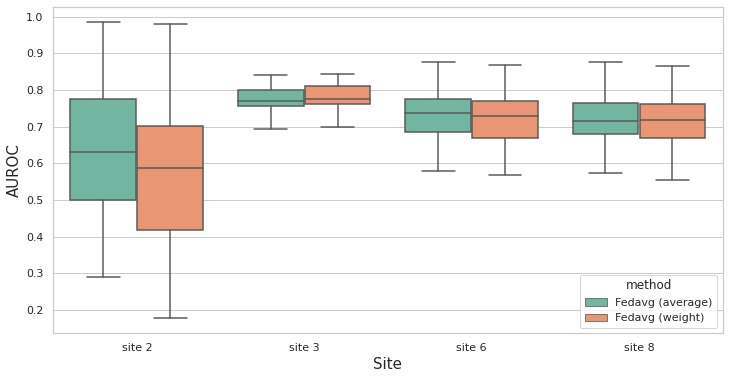

In [93]:
sns.set(style='whitegrid')
plt.figure(figsize=(12,6))
ax = sns.boxplot(x = 'site',y='mean',hue='method',data=boxplot_fedavg, palette="Set2",linewidth=1.5)
ax.set_ylabel("AUROC",fontsize=15)
ax.set_xlabel("Site",fontsize=15)

#### 比較Transfer Learning 用不同的平均方式 (一般平均和對不同醫院給不同權重的方式)的差距

In [94]:
df_transfer_average = concat(transfer_average, 'Transfer (average)')
df_transfer_weight = concat(transfer_weight, 'Transfer (weight)')
boxplot_transfer = pd.concat([df_transfer_average, df_transfer_weight])
pd.DataFrame(data=[transfer_average.mean(), transfer_weight.mean()],index =['Transfer Learning (average)', 'Transfer Learning (weight)'])

,site2,site3,site6,site8
Transfer Learning (average),0.539942,0.774285,0.677956,0.711678
Transfer Learning (weight),0.442088,0.778034,0.660476,0.694485


Text(0.5, 0, 'Site')

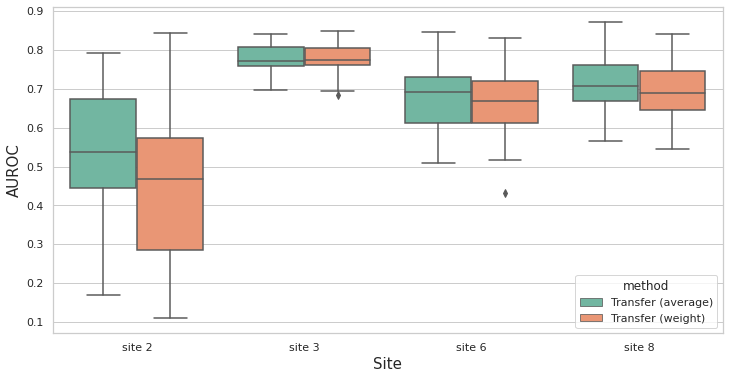

In [95]:
sns.set(style='whitegrid')
plt.figure(figsize=(12,6))
ax = sns.boxplot(x = 'site',y='mean',hue='method',data=boxplot_transfer, palette="Set2",linewidth=1.5)
ax.set_ylabel("AUROC",fontsize=15)
ax.set_xlabel("Site",fontsize=15)

#### 比較四種學習方式 Federated Learning 和 Transfer Learning 都用average方式

In [27]:
len(fedavg)

61

In [10]:
local = concat(local_df,'Localized Learning')
central = concat(centralized_df,'Centralized Learning')
df_fedavg = concat(fedavg, 'Fedavg (average)')
df_transfer = concat(transfer, 'Transfer (average)')
boxplot_all = pd.concat([df_fedavg,local,df_transfer,central])
pd.DataFrame(data=[fedavg.mean(), local_df.mean(), transfer.mean(), centralized_df.mean()],index =['Federated Learning (average)', 'Localized Learning' ,'Transfer Learning (average)', 'Centralized Learning'])

,site8,site3,site2,site6
Federated Learning (average),0.662265,0.730298,0.628821,0.637908
Localized Learning,0.575772,0.728558,0.402785,0.436443
Transfer Learning (average),0.661174,0.730921,0.657092,0.637075
Centralized Learning,0.664171,0.715755,0.643894,0.617528


In [ ]:
'''
'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 
'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 
'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 
'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 
'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 
'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 
'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 
'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 
'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 
'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 
'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 
'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 
'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 
'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'
'''

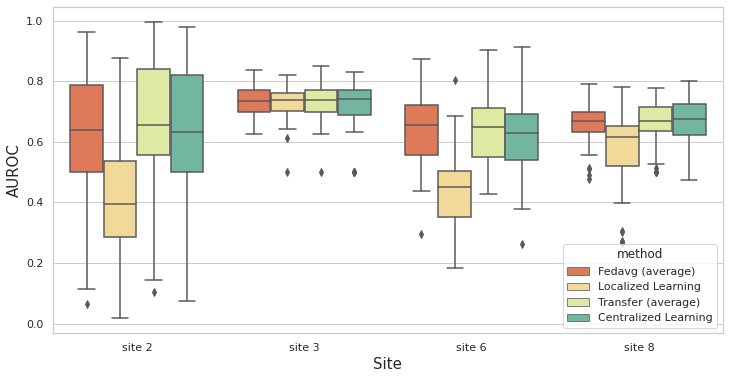

In [11]:
filename = 'target01'
sns.set(style='whitegrid')
plt.figure(figsize=(12,6))
ax = sns.boxplot(x = 'site',y='mean',hue='method',data=boxplot_all, palette="Spectral",linewidth=1.5)
ax.set_ylabel("AUROC",fontsize=15)
ax.set_xlabel("Site",fontsize=15)
plt.savefig('/home/refu0917/lungcancer/remote_output1/img_folder/'+filename)

Text(0.5, 0, 'Site')

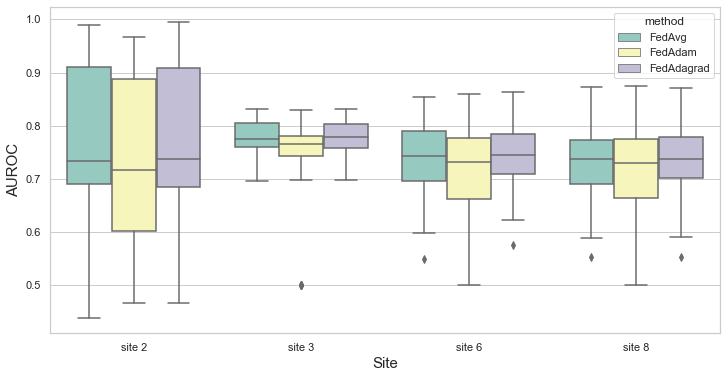

In [42]:
sns.set(style='whitegrid')
plt.figure(figsize=(12,6))
ax = sns.boxplot(x = 'site',y='mean',hue='method',data=boxplot2, palette="Set3",linewidth=1.5)
ax.set_ylabel("AUROC",fontsize=15)
ax.set_xlabel("Site",fontsize=15)

In [3]:
import scipy.stats as stats
from scipy.stats import shapiro
site2 = df[df['site'] == 'site 2']
site3 = df[df['site'] == 'site 3']
site6 = df[df['site'] == 'site 6']
site8 = df[df['site'] == 'site 8']

def split_method(df):
    fl = df[df['method'] == 'Federated Learning']
    cl = df[df['method'] == 'Centralized Learning']
    tl = df[df['method'] == 'Transfer Learning']
    ll = df[df['method'] == 'Localized Learning']
    return fl, cl, tl, ll

def check_distribution(df):
    print(np.unique(df.site))
    '''fl = df[df['method'] == 'Federated Learning']
    cl = df[df['method'] == 'Centralized Learning']
    tl = df[df['method'] == 'Transfer Learning']
    ll = df[df['method'] == 'Localized Learning']'''
    fl, cl,tl,ll = split_method(df)
    for i,j in zip([fl, cl,tl,ll],['Federated Learning','Centralized Learning','Transfer Learning','Localized Learning']):
        stat,p = shapiro(i['mean'])
        if p > 0.05:
            print(f'{j} pvalue={p} --> normal distribution')
        else:
            print(f'{j} pvalue={p} --> non-normal distribution')
    return

In [4]:
check_distribution(site2) #-->kruskal wallis
check_distribution(site3) #-->anova
check_distribution(site6) #-->kruskal wallis
check_distribution(site8) #-->anova

['site 2']
Federated Learning pvalue=0.0017631060909479856 --> non-normal distribution
Centralized Learning pvalue=0.3214898109436035 --> normal distribution
Transfer Learning pvalue=0.08616319298744202 --> normal distribution
Localized Learning pvalue=0.012976951897144318 --> non-normal distribution
['site 3']
Federated Learning pvalue=0.11725518107414246 --> normal distribution
Centralized Learning pvalue=0.23619839549064636 --> normal distribution
Transfer Learning pvalue=0.11769670248031616 --> normal distribution
Localized Learning pvalue=0.11769670248031616 --> normal distribution
['site 6']
Federated Learning pvalue=0.10238077491521835 --> normal distribution
Centralized Learning pvalue=0.48916685581207275 --> normal distribution
Transfer Learning pvalue=0.039354193955659866 --> non-normal distribution
Localized Learning pvalue=0.49258142709732056 --> normal distribution
['site 8']
Federated Learning pvalue=0.9033615589141846 --> normal distribution
Centralized Learning pvalue=0

# Site 2, 6 Kruskal Wallis

In [100]:
import scikit_posthocs as sp
def kruskal_wallis(df):
    print(np.unique(df.site))
    fl,cl,tl,ll = split_method(df)
    result = stats.kruskal(fl['mean'], cl['mean'], tl['mean'], ll['mean'])
    if result[1] < 0.05:
        print(f'{result[1]} , rejected h0')
    else:
        print(f'{result[1]} , do not rejected h0')
    # post hoc
    data = [fl['mean'], cl['mean'], tl['mean'], ll['mean']]
    
    p_values= sp.posthoc_dunn(df, val_col='mean', group_col='method')
    #p_values = sp.posthoc_conover(df, val_col='mean', group_col='method')
    p_values = pd.DataFrame(p_values)
    p_values = p_values.rename(columns={1:"Federated",2:"Centralized",3:"Transfered",4:"Localized"},index={1:"Federated",2:"Centralized",3:"Transfered",4:"Localized"})
    #print(p_values < 0.05)
    return pd.DataFrame(p_values)

site2_p_value = kruskal_wallis(site2)
site6_p_value = kruskal_wallis(site6)

['site 2']
9.124440742718965e-10 , rejected h0
['site 6']
0.0037720528160807795 , rejected h0


In [103]:
site2_p_value

,Centralized Learning,Federated Learning,Localized Learning,Transfer Learning
Centralized Learning,1.000000e+00,9.576395e-09,1.131978e-08,0.000002
Federated Learning,9.576395e-09,1.000000e+00,9.773437e-01,0.329305
Localized Learning,1.131978e-08,9.773437e-01,1.000000e+00,0.343580
Transfer Learning,1.911600e-06,3.293055e-01,3.435804e-01,1.000000


In [104]:
site6_p_value

,Centralized Learning,Federated Learning,Localized Learning,Transfer Learning
Centralized Learning,1.000000,0.013977,0.847988,0.309321
Federated Learning,0.013977,1.000000,0.008060,0.000512
Localized Learning,0.847988,0.008060,1.000000,0.409394
Transfer Learning,0.309321,0.000512,0.409394,1.000000


# Site 3, 8 ANOVA

In [53]:
import statsmodels.stats.multicomp as mc
def oneway_anova(df):
    print(f'{np.unique(df.site)} anova analysis result : ')
    fl, cl, tl, ll = split_method(df)
    # one - way anova
    result = scipy.stats.f_oneway(fl['mean'], cl['mean'], tl['mean'], ll['mean'])  
    if result[1] < 0.05:
        print(f'{result[1]} , rejected h0')
    else:
        print(f'{result[1]} , do not rejected h0')
    # post hoc
    comp = mc.MultiComparison(df['mean'],df['method'])
    # bonferroni
    tbl_bonf, _, _ = comp.allpairtest(stats.ttest_ind, method= "bonf")
    print(tbl_bonf)
    # sidak
    tbl_sidak, _, _ = comp.allpairtest(stats.ttest_ind, method= "sidak")
    print(tbl_sidak)
    
    # tukey 
    post_hoc_res = comp.tukeyhsd()
    print(post_hoc_res.summary())
    # scheffe
    return

In [58]:
oneway_anova(site3)

['site 3'] anova analysis result : 
0.3674407613282215 , do not rejected h0
Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.01, alphacBonf=0.008
       group1              group2        stat   pval  pval_corr reject
----------------------------------------------------------------------
Centralized Learning Federated Learning 1.1032 0.2723       1.0  False
Centralized Learning Localized Learning  1.522 0.1308    0.7849  False
Centralized Learning  Transfer Learning  1.522 0.1308    0.7849  False
  Federated Learning Localized Learning 0.4504 0.6533       1.0  False
  Federated Learning  Transfer Learning 0.4504 0.6533       1.0  False
  Localized Learning  Transfer Learning    0.0    1.0       1.0  False
----------------------------------------------------------------------
Test Multiple Comparison ttest_ind 
FWER=0.05 method=sidak
alphacSidak=0.01, alphacBonf=0.008
       group1              group2        stat   pval  pval_corr reject
---------------------------

c:\Users\refuhung\anaconda3\envs\tf2.8.0\lib\site-packages\statsmodels\stats\multitest.py:155: RuntimeWarning: divide by zero encountered in log1p
  pvals_corrected = -np.expm1(ntests * np.log1p(-pvals))


             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
       group1              group2       meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------------
Centralized Learning Federated Learning   -0.007 0.6916 -0.0235 0.0095  False
Centralized Learning Localized Learning  -0.0098 0.4144 -0.0263 0.0067  False
Centralized Learning  Transfer Learning  -0.0098 0.4144 -0.0263 0.0067  False
  Federated Learning Localized Learning  -0.0028 0.9706 -0.0193 0.0136  False
  Federated Learning  Transfer Learning  -0.0028 0.9706 -0.0193 0.0136  False
  Localized Learning  Transfer Learning      0.0    1.0 -0.0165 0.0165  False
-----------------------------------------------------------------------------


In [56]:
oneway_anova(site8)

['site 8'] anova analysis result : 
0.19642807140919463 , do not rejected h0
Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.01, alphacBonf=0.008
       group1              group2         stat   pval  pval_corr reject
-----------------------------------------------------------------------
Centralized Learning Federated Learning -1.3742 0.1721       1.0  False
Centralized Learning Localized Learning  0.6976 0.4869       1.0  False
Centralized Learning  Transfer Learning  0.2237 0.8234       1.0  False
  Federated Learning Localized Learning  2.0713 0.0406    0.2438  False
  Federated Learning  Transfer Learning  1.5962 0.1133    0.6796  False
  Localized Learning  Transfer Learning -0.4731 0.6371       1.0  False
-----------------------------------------------------------------------
Test Multiple Comparison ttest_ind 
FWER=0.05 method=sidak
alphacSidak=0.01, alphacBonf=0.008
       group1              group2         stat   pval  pval_corr reject
----------------

<AxesSubplot:>

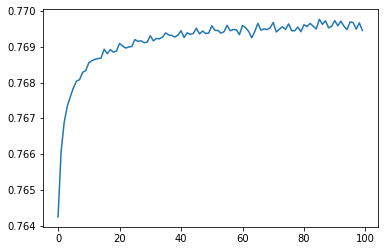

In [14]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('/home/refu0917/lungcancer/remote_output1/output_folder/fl_auc_df9.csv')
df = df.T
sns.lineplot(data=df.mean())

In [3]:
local_result = pd.read_csv('local_result.csv',index_col=[0])

<AxesSubplot:ylabel='val_auc_rec'>

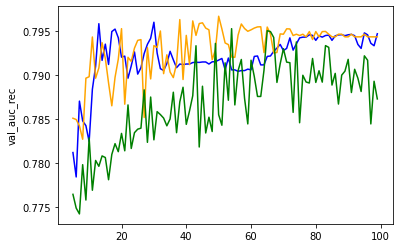

In [7]:
sns.lineplot(data=local_result['val_auc_rec'][5:],color='blue')
sns.lineplot(data=local_result['val_auc_exp'][5:],color='orange')
sns.lineplot(data=local_result['val_auc'][5:],color='green')

<AxesSubplot:ylabel='val_loss_rec'>

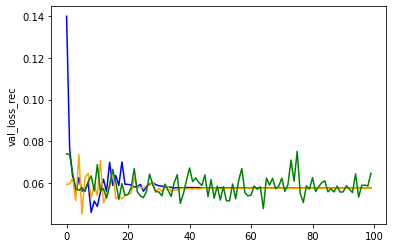

In [5]:
sns.lineplot(data=local_result['val_loss_rec'],color='blue')
sns.lineplot(data=local_result['val_loss_exp'],color='orange')
sns.lineplot(data=local_result['val_loss'],color='green')